In [1]:
import os
import pandas as pd
import json
import time
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon, mapping
from shapely.wkt import loads
from geojson import MultiPoint
from geojson import MultiPolygon
from geojson import Polygon
from geopandas import GeoDataFrame
import math
import matplotlib.pyplot as plt
from collections import Counter
import ast

In [26]:
with open('neighbourhoods.geojson') as f:
    airbnb_geo = json.load(f)

In [27]:
crs = {'init': 'epsg:4326'}
airbnb_geo = gpd.GeoDataFrame.from_features(airbnb_geo['features'], crs=crs).drop(['neighbourhood_group'], axis=1)

In [4]:
airbnb_geo.head()

,geometry,neighbourhood
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce


In [28]:
df=pd.read_csv('AllCoffeeFinalApril.csv').iloc[:,1:].reset_index(drop=True)
df.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url,long,lat
0,taliza-coffee-santa-fe-springs,"['coffeeroasteries', 'coffee', 'breakfast_brun...","{'latitude': 33.9029363647326, 'longitude': -1...",(213) 330-5229,1737.700260,rs5eKXExQrwSvUJNi0A78g,https://s3-media4.fl.yelpcdn.com/bphoto/LCyCTi...,False,"{'address1': '13217 Rosecrans Ave', 'address2'...",Taliza Coffee,1.213331e+10,$,4.5,132,[],https://www.yelp.com/biz/taliza-coffee-santa-f...,-118.049800,33.902936
1,kape-republik-cerritos,"['desserts', 'cafes', 'coffee']","{'latitude': 33.8739356994629, 'longitude': -1...",(562) 865-5000,2029.428768,eDTipq688TIhMTkDMhdaUA,https://s3-media3.fl.yelpcdn.com/bphoto/X7nAJn...,False,"{'address1': '17206 Norwalk Blvd', 'address2':...",Kape Republik,1.562866e+10,$,4.5,582,"['delivery', 'pickup']",https://www.yelp.com/biz/kape-republik-cerrito...,-118.071419,33.873936
2,7-leaves-cafe-artesia-3,"['coffee', 'macarons']","{'latitude': 33.8727839736181, 'longitude': -1...",(562) 278-2572,2258.545948,mAhkHjXLddbmxftSTz_OEw,https://s3-media1.fl.yelpcdn.com/bphoto/L2yyn2...,False,"{'address1': '12154 Artesia Blvd', 'address2':...",7 Leaves Cafe,1.562278e+10,$,4.0,379,[],https://www.yelp.com/biz/7-leaves-cafe-artesia...,-118.072899,33.872784
3,cafe-maji-artesia,"['cafes', 'coffee', 'burgers']","{'latitude': 33.8729251, 'longitude': -118.071...",(562) 281-9511,2187.379592,YhJ2bXYk-SIxpFfT4RgHUQ,https://s3-media2.fl.yelpcdn.com/bphoto/rmNuVr...,False,"{'address1': '12232 E Artesia Blvd', 'address2...",Cafe Maji,1.562282e+10,$,4.0,963,[],https://www.yelp.com/biz/cafe-maji-artesia?adj...,-118.071635,33.872925
4,perfected-quality-coffee-service-norwalk,['coffee'],"{'latitude': 33.89087, 'longitude': -118.06323}",(562) 921-7470,546.043077,934ULxIbOV7NcuTjHrkfQw,NaN,False,"{'address1': '15416 Lancelot Ave', 'address2':...",Perfected Quality Coffee Service,1.562922e+10,NaN,5.0,1,[],https://www.yelp.com/biz/perfected-quality-cof...,-118.063230,33.890870


In [29]:
geometry = [Point(xy) for xy in zip(df.long, df.lat)]
crs = {'init': 'epsg:4326'}
coffee_gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

(33.6, 34.9)

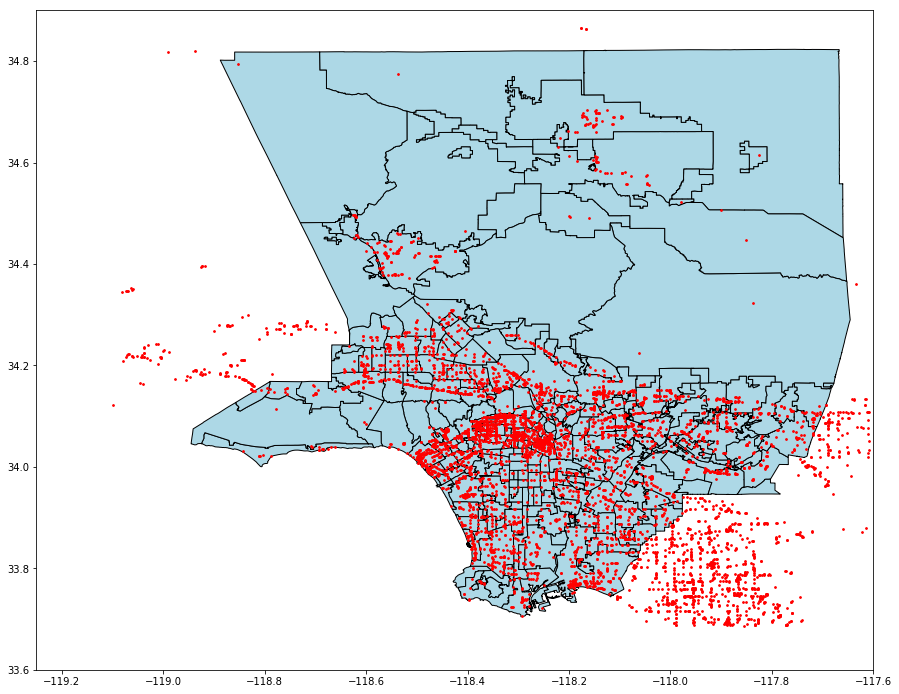

In [30]:
base = airbnb_geo.plot(figsize=(15,20), color='lightblue', edgecolor='k')
coffee_plot=coffee_gdf.plot(ax=base, figsize=(15,20), color='r', markersize=3)
coffee_plot.set_xlim([-119.25,-117.6])
coffee_plot.set_ylim([33.6,34.9])

In [31]:
merged_airbnb_gdf = gpd.sjoin(coffee_gdf, airbnb_geo, op='within').reset_index()

(33.5, 34.9)

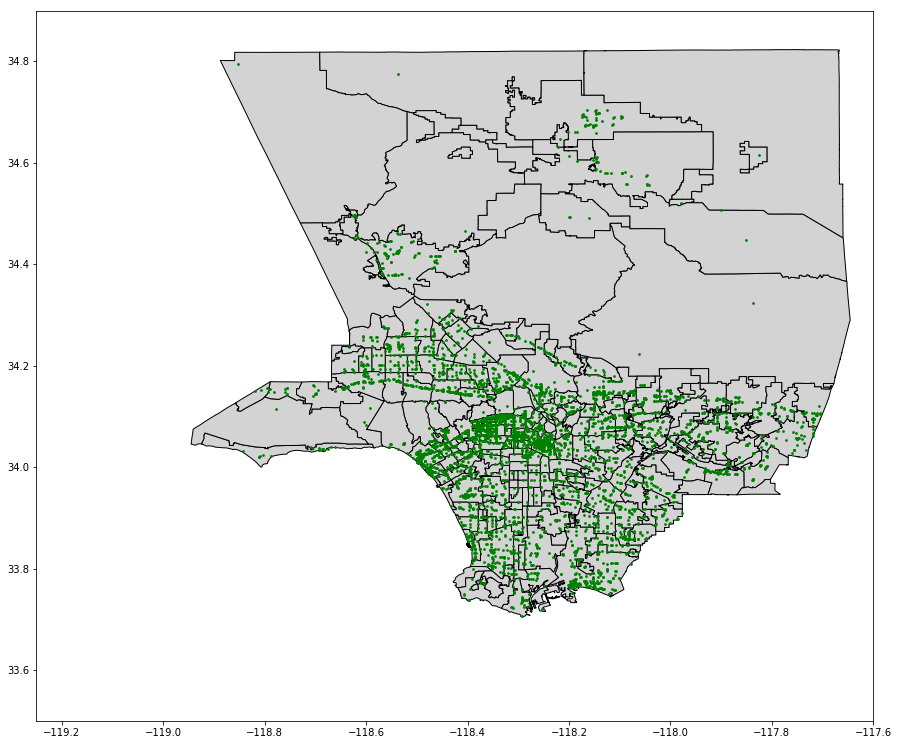

In [32]:
base = airbnb_geo.plot(figsize=(15,20), color='lightgray', edgecolor='k')
coffee_plot=merged_airbnb_gdf.plot(ax=base, figsize=(15,20), color='g', markersize=3)
coffee_plot.set_xlim([-119.25,-117.6])
coffee_plot.set_ylim([33.5,34.9])

In [35]:
#drop unnecessary columns
merged_airbnb_gdf=merged_airbnb_gdf.drop(['index', 'is_closed', 'index_right', 'distance','display_phone','phone'], axis=1)

In [36]:
merged_airbnb_gdf.head()

,alias,categories,coordinates,id,image_url,location,name,price,rating,review_count,transactions,url,long,lat,geometry,neighbourhood
0,taliza-coffee-santa-fe-springs,"['coffeeroasteries', 'coffee', 'breakfast_brun...","{'latitude': 33.9029363647326, 'longitude': -1...",rs5eKXExQrwSvUJNi0A78g,https://s3-media4.fl.yelpcdn.com/bphoto/LCyCTi...,"{'address1': '13217 Rosecrans Ave', 'address2'...",Taliza Coffee,$,4.5,132,[],https://www.yelp.com/biz/taliza-coffee-santa-f...,-118.049800,33.902936,POINT (-118.049799576402 33.9029363647326),Santa Fe Springs
1,dapuri-malaysian-white-coffee-santa-fe-springs,['coffee'],"{'latitude': 33.88565, 'longitude': -118.03058}",b2domRSPAeUIP9lEARAYMQ,https://s3-media1.fl.yelpcdn.com/bphoto/uPbQGL...,"{'address1': '14111 Freeway Dr', 'address2': '...",Dapuri Malaysian White Coffee,$,5.0,1,[],https://www.yelp.com/biz/dapuri-malaysian-whit...,-118.030580,33.885650,POINT (-118.03058 33.88565),Santa Fe Springs
2,starbucks-santa-fe-springs-7,['coffee'],"{'latitude': 33.887704, 'longitude': -118.029368}",g2ldfV2yjU-Yd7r0H-Lh3g,https://s3-media2.fl.yelpcdn.com/bphoto/r6Ct_p...,"{'address1': '15905 Valley View Avenue', 'addr...",Starbucks,$$,2.5,95,[],https://www.yelp.com/biz/starbucks-santa-fe-sp...,-118.029368,33.887704,POINT (-118.029368 33.887704),Santa Fe Springs
3,koupa-cafe-santa-fe-springs,"['greek', 'coffee', 'sandwiches']","{'latitude': 33.8997929, 'longitude': -118.029...",p4gvFD_YBgLMUY3cye-qbQ,https://s3-media4.fl.yelpcdn.com/bphoto/Lm6Fy0...,"{'address1': '14565 Valley View Ave', 'address...",Koupa Cafe,$,5.0,42,[],https://www.yelp.com/biz/koupa-cafe-santa-fe-s...,-118.029285,33.899793,POINT (-118.0292849 33.8997929),Santa Fe Springs
4,the-greenhouse-santa-fe-springs,['coffee'],"{'latitude': 33.8856984724873, 'longitude': -1...",BimMFJr3R9_t3CKVLxDvwA,NaN,"{'address1': '14050 Firestone Blvd', 'address2...",The Greenhouse,NaN,2.0,1,[],https://www.yelp.com/biz/the-greenhouse-santa-...,-118.032532,33.885698,POINT (-118.03253200641 33.8856984724873),Santa Fe Springs


In [37]:
airbnb_geo.head()

,geometry,neighbourhood
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce


In [38]:
# add count of coffee shops in each neighborhood
neighborhood_counts = dict(merged_airbnb_gdf.groupby('neighbourhood').count().iloc[:,0])
airbnb_geo['count'] = airbnb_geo.neighbourhood.map(neighborhood_counts)\
                                    .fillna(0) \
                                    .astype(int)
airbnb_geo.head()

,geometry,neighbourhood,count
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0


In [39]:
# add mean rating to map df
rating_mean = dict(merged_airbnb_gdf.groupby('neighbourhood').mean()['rating'])
airbnb_geo['mean_rating'] = airbnb_geo.neighbourhood.map(rating_mean)\
                                          .round(3)
airbnb_geo.head()

,geometry,neighbourhood,count,mean_rating
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3,3.333
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3,3.833
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7,3.357
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13,3.692
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0,NaN


In [40]:
# add mean price to map df
price_map = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
merged_airbnb_gdf['price_int'] = merged_airbnb_gdf.price.map(price_map)
price_mean = dict(merged_airbnb_gdf.groupby('neighbourhood').mean()['price_int'])
airbnb_geo['mean_price'] = airbnb_geo.neighbourhood.map(price_mean)\
                                         .round(3)
airbnb_geo.head()

,geometry,neighbourhood,count,mean_rating,mean_price
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3,3.333,1.000
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3,3.833,1.667
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7,3.357,1.286
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13,3.692,1.200
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0,NaN,NaN


In [41]:
# add mean review count to map df
total_reviews = dict(merged_airbnb_gdf.groupby('neighbourhood').mean()['review_count'])
airbnb_geo['avg_review_count'] = airbnb_geo.neighbourhood.map(total_reviews)\
                                           .fillna(0) \
                                           .astype(int) 
airbnb_geo.head()

,geometry,neighbourhood,count,mean_rating,mean_price,avg_review_count
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3,3.333,1.000,46
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3,3.833,1.667,303
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7,3.357,1.286,94
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13,3.692,1.200,88
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0,NaN,NaN,0


In [42]:
# indentify 'chain' coffee stores as those with > 3 location in a city
# add percentage of stores that are chain for each neighborhood to map df
chain = dict(merged_airbnb_gdf['name'].value_counts() > 3)
merged_airbnb_gdf['chain'] = merged_airbnb_gdf.name.map(chain)
pct_chain = dict(merged_airbnb_gdf.groupby('neighbourhood').mean()['chain'])
airbnb_geo['pct_chain'] = airbnb_geo.neighbourhood.map(pct_chain)\
                                             .astype(float)\
                                             .round(3)
airbnb_geo.head()

,geometry,neighbourhood,count,mean_rating,mean_price,avg_review_count,pct_chain
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3,3.333,1.000,46,0.333
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3,3.833,1.667,303,0.333
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7,3.357,1.286,94,0.714
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13,3.692,1.200,88,0.308
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0,NaN,NaN,0,NaN


In [43]:
def get_city(x):
    y=ast.literal_eval(x)
    z=y['city']
    return(z)
def get_address1(x):
    y=ast.literal_eval(x)
    z=y['address1']
    return(z)
def get_address2(x):
    y=ast.literal_eval(x)
    z=y['address2']
    return(z)
def get_address3(x):
    y=ast.literal_eval(x)
    z=y['address3']
    return(z)
def get_zip_code(x):
    y=ast.literal_eval(x)
    z=y['zip_code']
    return(z)

In [44]:
merged_airbnb_gdf['store_add1']=merged_airbnb_gdf['location'].apply(lambda x: get_address1(x))
merged_airbnb_gdf['store_add2']=merged_airbnb_gdf['location'].apply(lambda x: get_address2(x))
merged_airbnb_gdf['store_add3']=merged_airbnb_gdf['location'].apply(lambda x: get_address3(x))
merged_airbnb_gdf['store_zip_code']=merged_airbnb_gdf['location'].apply(lambda x: get_zip_code(x))

In [45]:
merged_airbnb_gdf=merged_airbnb_gdf.drop(['location'], axis=1)

In [46]:
merged_airbnb_gdf=merged_airbnb_gdf.drop(['coordinates'], axis=1)

In [48]:
merged_airbnb_gdf.shape

(4506, 20)

In [51]:
merged_airbnb_gdf.head()

,alias,categories,id,image_url,name,price,rating,review_count,transactions,url,long,lat,geometry,neighbourhood,price_int,chain,store_add1,store_add2,store_add3,store_zip_code
0,taliza-coffee-santa-fe-springs,"['coffeeroasteries', 'coffee', 'breakfast_brun...",rs5eKXExQrwSvUJNi0A78g,https://s3-media4.fl.yelpcdn.com/bphoto/LCyCTi...,Taliza Coffee,$,4.5,132,[],https://www.yelp.com/biz/taliza-coffee-santa-f...,-118.049800,33.902936,POINT (-118.049799576402 33.9029363647326),Santa Fe Springs,1.0,False,13217 Rosecrans Ave,None,,90670
1,dapuri-malaysian-white-coffee-santa-fe-springs,['coffee'],b2domRSPAeUIP9lEARAYMQ,https://s3-media1.fl.yelpcdn.com/bphoto/uPbQGL...,Dapuri Malaysian White Coffee,$,5.0,1,[],https://www.yelp.com/biz/dapuri-malaysian-whit...,-118.030580,33.885650,POINT (-118.03058 33.88565),Santa Fe Springs,1.0,False,14111 Freeway Dr,Ste 300,,90670
2,starbucks-santa-fe-springs-7,['coffee'],g2ldfV2yjU-Yd7r0H-Lh3g,https://s3-media2.fl.yelpcdn.com/bphoto/r6Ct_p...,Starbucks,$$,2.5,95,[],https://www.yelp.com/biz/starbucks-santa-fe-sp...,-118.029368,33.887704,POINT (-118.029368 33.887704),Santa Fe Springs,2.0,True,15905 Valley View Avenue,,,90670
3,koupa-cafe-santa-fe-springs,"['greek', 'coffee', 'sandwiches']",p4gvFD_YBgLMUY3cye-qbQ,https://s3-media4.fl.yelpcdn.com/bphoto/Lm6Fy0...,Koupa Cafe,$,5.0,42,[],https://www.yelp.com/biz/koupa-cafe-santa-fe-s...,-118.029285,33.899793,POINT (-118.0292849 33.8997929),Santa Fe Springs,1.0,False,14565 Valley View Ave,None,None,90670
4,the-greenhouse-santa-fe-springs,['coffee'],BimMFJr3R9_t3CKVLxDvwA,NaN,The Greenhouse,NaN,2.0,1,[],https://www.yelp.com/biz/the-greenhouse-santa-...,-118.032532,33.885698,POINT (-118.03253200641 33.8856984724873),Santa Fe Springs,NaN,False,14050 Firestone Blvd,None,None,90670


In [52]:
merged_airbnb_gdf.to_csv('coffee_shop_neighborhood_April_2019.csv')

In [53]:
airbnb_geo.head()

,geometry,neighbourhood,count,mean_rating,mean_price,avg_review_count,pct_chain
0,"(POLYGON Z ((-118.202617 34.53899 0, -118.1982...",Acton,3,3.333,1.000,46,0.333
1,"(POLYGON Z ((-118.309008 34.037411 0, -118.305...",Adams-Normandie,3,3.833,1.667,303,0.333
2,"(POLYGON Z ((-118.761925 34.168203 0, -118.761...",Agoura Hills,7,3.357,1.286,94,0.714
3,"(POLYGON Z ((-118.315909 34.052611 0, -118.315...",Arlington Heights,13,3.692,1.200,88,0.308
4,"(POLYGON Z ((-118.254677 34.558304 0, -118.254...",Agua Dulce,0,NaN,NaN,0,NaN


In [55]:
airbnb_geo.reset_index().to_file(driver = 'ESRI Shapefile', filename= "LA_County.shp")